In [2]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system ==

In [3]:
from datasets import load_dataset

dataset = load_dataset("dair-ai/emotion")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [4]:
print(dataset)

print(dataset['train'][0])


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})
{'text': 'i didnt feel humiliated', 'label': 0}


In [15]:
labels = dataset['train'].features['label'].names
print("Emotion labels:", labels)


Emotion labels: ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']


In [16]:
import pandas as pd

df = pd.DataFrame(dataset['train'])
df.head()


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


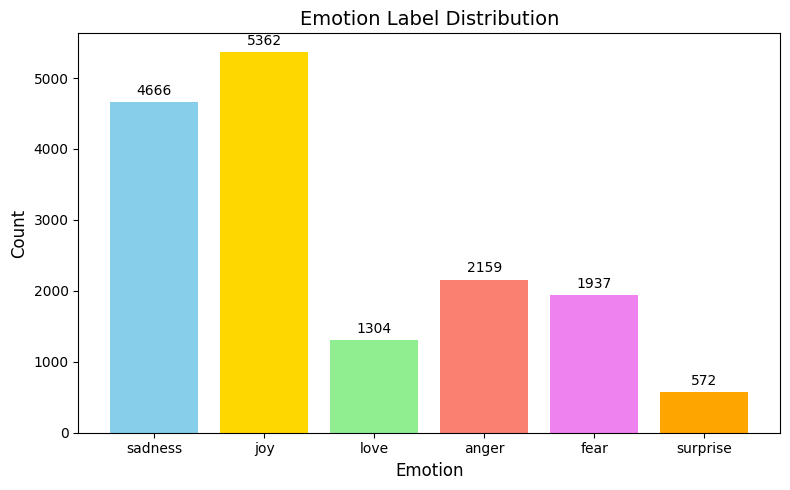

In [7]:
import matplotlib.pyplot as plt

emotion_labels = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

label_counts = df['label'].value_counts().sort_index()

emotions = [emotion_labels[i] for i in label_counts.index]
counts = label_counts.values
colors = ['skyblue', 'gold', 'lightgreen', 'salmon', 'violet', 'orange']

plt.figure(figsize=(8, 5))
bars = plt.bar(emotions, counts, color=colors)
plt.title("Emotion Label Distribution", fontsize=14)
plt.xlabel("Emotion", fontsize=12)
plt.ylabel("Count", fontsize=12)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 100, int(yval), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [10]:
from datasets import load_dataset
import pandas as pd

# Load dataset
dataset = load_dataset("dair-ai/emotion")

# Convert to DataFrame
df = pd.DataFrame(dataset['train'])

# Get label names from dataset metadata
label_names = dataset['train'].features['label'].names

# Add readable labels to DataFrame
df['label_name'] = df['label'].apply(lambda x: label_names[x])

# Print one sample text per emotion
for emotion in label_names:
    sample = df[df['label_name'] == emotion].sample(1)['text'].values[0]
    print(f"{emotion.upper()}: {sample}")


SADNESS: i feel foolish admitting how hard this hit me
JOY: im an organised person so i feel more assured of myself when i pre plan
LOVE: i didnt want to be a part of a group just to feel accepted
ANGER: i feel i really wronged commodore
FEAR: i cant even explain how difficult it is to tear yourself away from something you both love and feel doubtful of
SURPRISE: i still feel so amazed knowing i stood right in front of jason


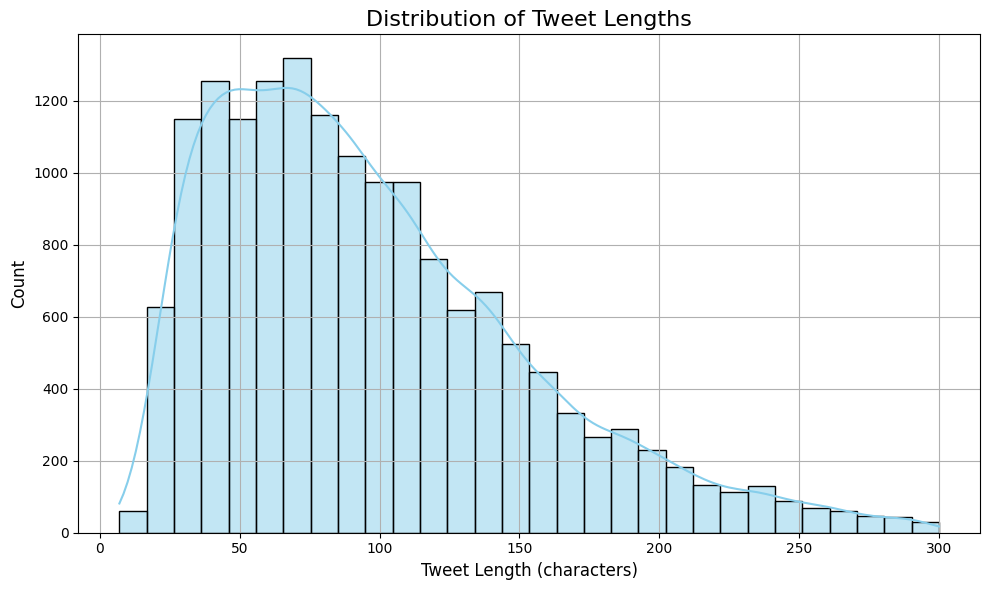

In [12]:
# Add text length column
df['text_length'] = df['text'].apply(len)

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Tweet Lengths", fontsize=16)
plt.xlabel("Tweet Length (characters)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


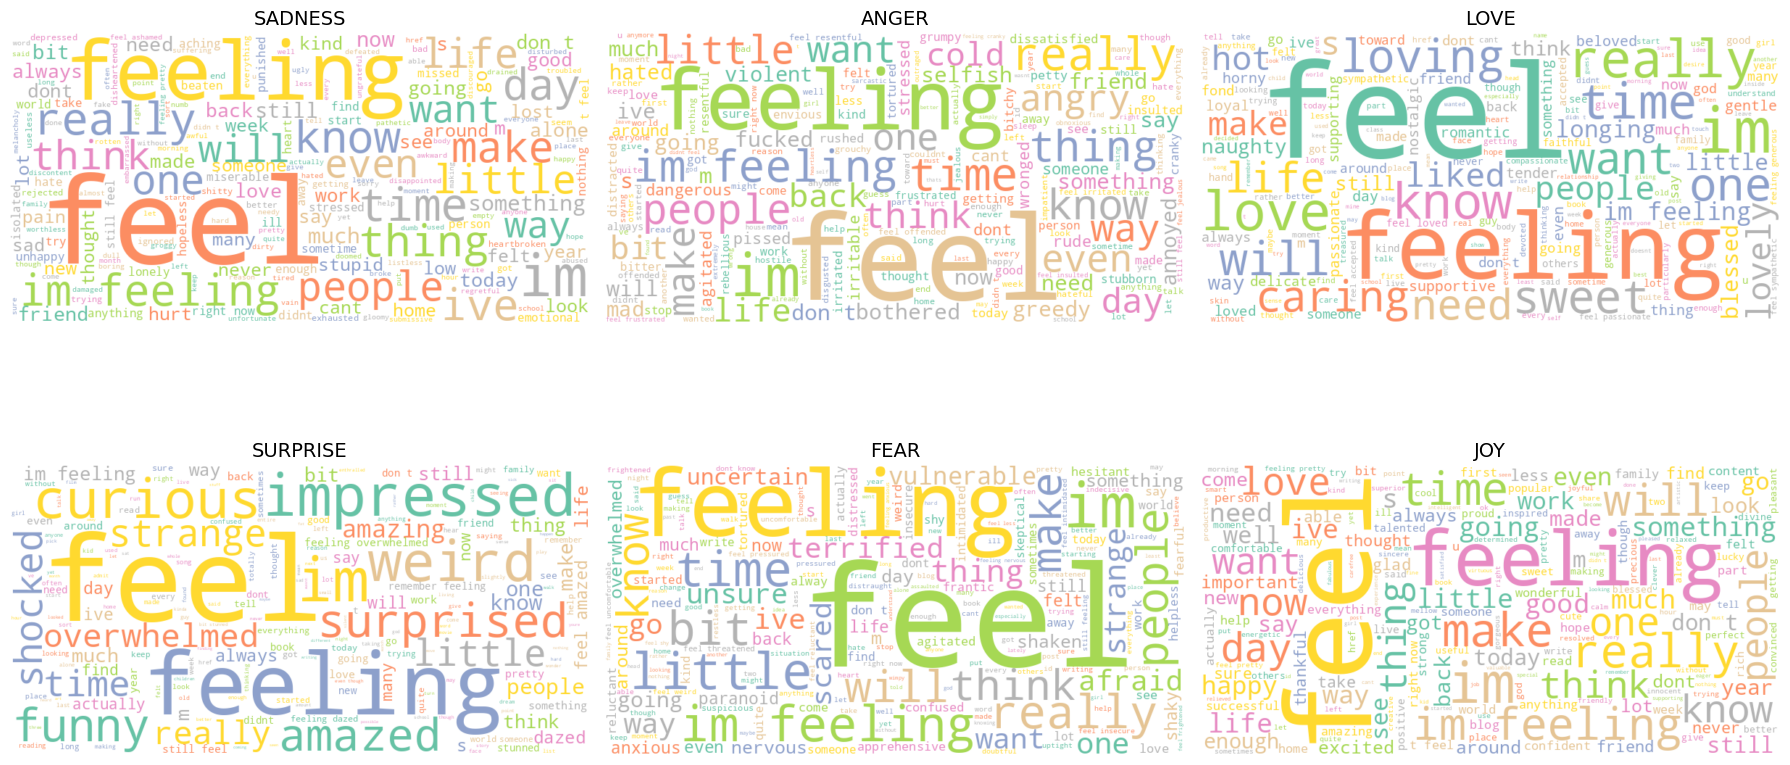

In [13]:
from wordcloud import WordCloud
from collections import defaultdict

emotion_texts = defaultdict(str)
for i, row in df.iterrows():
    emotion_texts[row['label_name']] += ' ' + row['text']

# Plot word clouds
plt.figure(figsize=(18, 10))
for i, (emotion, text) in enumerate(emotion_texts.items()):
    plt.subplot(2, 3, i+1)
    wc = WordCloud(width=800, height=400, background_color='white', colormap='Set2').generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(emotion.upper(), fontsize=14)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [14]:
for emotion in df['label_name'].unique():
    print(f"\n📌 {emotion.upper()}")
    samples = df[df['label_name'] == emotion].sample(3, random_state=1)['text'].values
    for idx, text in enumerate(samples, 1):
        print(f"{idx}. {text}")



📌 SADNESS
1. i still feel guilty to this day for taking a spot
2. i feel so empty and cold inside
3. i feel most unwelcome

📌 ANGER
1. i plot that makes the reader feel like he is with owen morgan during his dangerous undertaking
2. i feel i really wronged commodore
3. i feel like you feel this is a mistake but time is fucked up sleep won t take

📌 LOVE
1. i met a really cute girl who i feel kind of fond for today and normally girls are really complex to me but i can just be myself around her
2. i wake up i realize that my panty is wet and i feel very horny
3. i am feeling i still should be caring and concerned

📌 SURPRISE
1. i feel so weird about it
2. im not sure if anyone else will feel these but i was pleasantly surprised by my read of the first and second book
3. ive seen how mean other kids and adults can be to a child who doesnt fit into the norm and no way was i going to label him so he could be made to feel he was anything other than amazing

📌 FEAR
1. i feel especially vulne